# Ventanas móviles en pandas

Pandas tiene 3 métodos principales que nos permiten realizar operaciones de agregación sobre ventanas deslizantes de datos:

* __rolling()__ ventana deslizante

* __expanding()__ expanding window

* __ewm()__ exponentially weighted


Para una información detallada de éstos métodos pulsa [aquí](https://pandas.pydata.org/docs/user_guide/window.html)

Los dos métodos más usados son:
<br>
<br>
<left>
<img src="imgs/pandas windows.jpeg"  alt="drawing" width="40%"/>
</left>

Veamos unos ejemplos:

In [2]:
from datetime import datetime, date, time, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Cargamos los precios de cierre de Cisco del fichero csco.csv en la carpeta data y calculamos los retornos logarítmicos

In [9]:
csco_data = pd.read_csv("data/csco.csv", parse_dates = ['Date'], index_col = 0)
csco_data["ret"] = np.log(csco_data["Close"]).diff()
csco_data.head()

,Close,ret
Date,,
2020-01-02,44.830410,NaN
2020-01-03,44.098980,-0.016450
2020-01-06,44.256382,0.003563
2020-01-07,43.969360,-0.006507
2020-01-08,43.997135,0.000631


La función __rolling()__ nos permite aplicar diversas funciones sobre los datos contenidos en las ventanas deslizantes. Los parámetros principales son:

* window: tamaño de la ventana
* min_periods: mínimo número de periodos con datos para devolver un valor
* center: si es True la ventana será centrada. Por defecto es False.

La documentación completa esta [aquí](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)


__Ejemplos de medias móviles__

In [10]:
csco_data.rolling(5).mean()

,Close,ret
Date,,
2020-01-02,NaN,NaN
2020-01-03,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,44.230453,NaN
...,...,...
2022-09-08,44.948000,0.002886
2022-09-09,45.044000,0.002109
2022-09-12,45.406001,0.007958


Si queremos solo de una columna

In [11]:
csco_data["ret"].rolling(5).mean()

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2022-09-08    0.002886
2022-09-09    0.002109
2022-09-12    0.007958
2022-09-13   -0.001626
2022-09-14   -0.003767
Name: ret, Length: 681, dtype: float64

<AxesSubplot:xlabel='Date'>

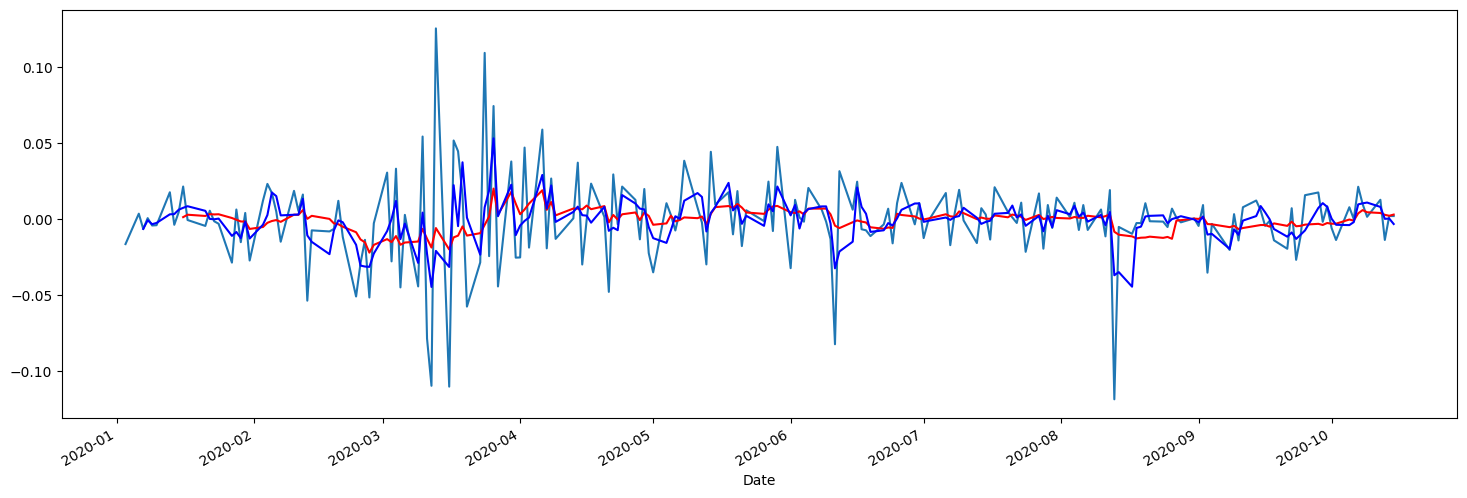

In [23]:
csco_data.iloc[:200,]["ret"].plot(figsize=(18,6))
csco_data.iloc[:200,]["ret"].rolling(10).mean().plot(c="r")
csco_data.iloc[:200,]["ret"].rolling(3).mean().plot(c="b")

__Ejemplos de volatilidades__

<AxesSubplot:xlabel='Date'>

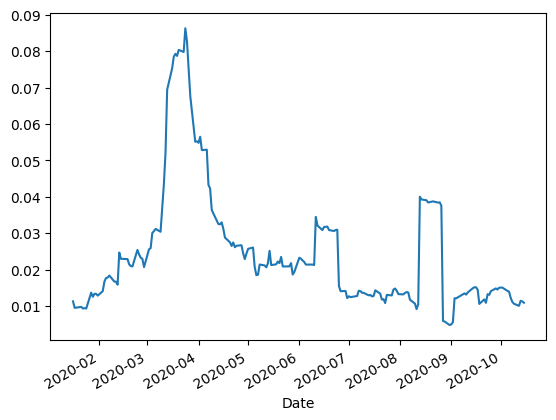

In [25]:
csco_data.iloc[:200,]["ret"].rolling(10).std().plot()

__VENTANAS EXPANSIVAS__

In [27]:
expanding_max = csco_data["Close"].expanding().max()

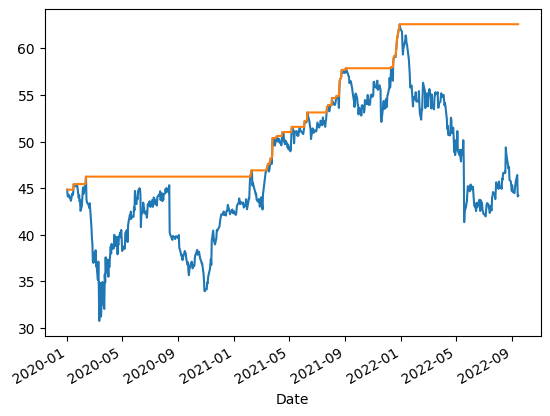

In [29]:
csco_data["Close"].plot();
expanding_max.plot();


__Max Drawdown__ es una medida de riesgo de un activo.

El drawdown es el retroceso de la curva de resultados desde el máximo anterior de referencia hasta el mínimo durante un período determinado.
<br>
<br>

<left>
<img src="imgs/drawdown.png"  alt="drawing" width="30%"/>
</left>

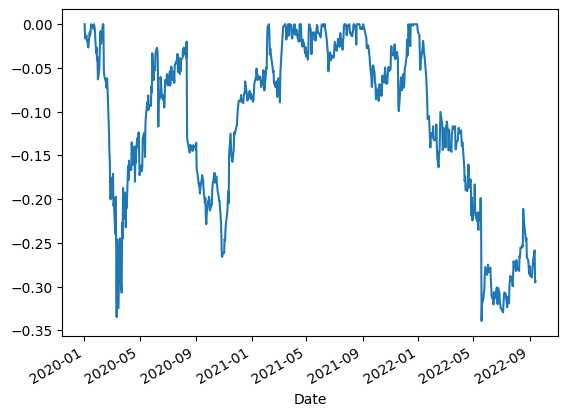

In [39]:
drawdown = (csco_data["Close"] / expanding_max)-1
drawdown.plot();

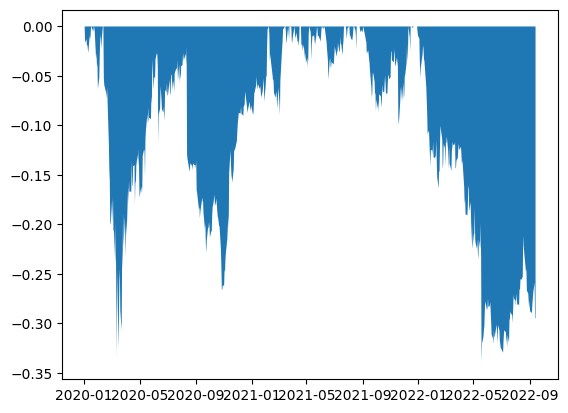

In [37]:
plt.fill_between(csco_data.index.values, drawdown);

# Ejercicios

Carga los csvs de datos ibex_div, ibex, NTGY, REE, SAN, pon la fecha como índice.

Calcula el retorno anualizado del Ibex con dividendos y del Ibex.

Calcula la serie de retornos anuales  del Ibex con dividendos y del Ibex.

Realiza un gráfico de barras comparándolos.

Compara los retornos anuales del Ibex con los de SAN.

Calcula la correlación del SAN, REE y NTGY con el IBEX con dividendos.

Ahora calcula la correlación rolada de 100 días para los activos del ejercico anterior.


Calcula la media movil de 30 y 200 dias de REE y realiza una figura junto con la serie de precios originales

Usando el precio de cierre del Ibex, calcula las velas mensuales y anuales.

Píntalas utilizando un gráfico de barras.

Calcula la beta de los 3 activos NTGY, REE y SAN, Recuerda:

$\beta = \frac{cov(R_m, R_s)}{var(R_m)}$

Donde $R_m$ y $R_s$ son la serie de retornos del índice y de la acción.

Ahora calcula la beta rolada de 100 días para los activos del ejercico anterior